# Funciones Extra

In [8]:
# Plot polynomials

def plotPoly(polys, name, L, R, col = None):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=classic_colors[i % len(classic_colors)])
    show(a)

In [10]:
def Lagrange(points):
    #x = R.0
    var('x')
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [11]:
def plotDerivative(points, method, name, color = None):
    n = len(points)
    assert(n > 1)
    pointsdx = points
    polys = []
    L = []
    R = []
    for i in range(n-1):
        P = Lagrange([pointsdx[i], pointsdx[i+1]])
        polys.append(P)
        L.append(pointsdx[i][0])
        R.append(pointsdx[i+1][0])
    plotPoly(polys, name, L, R, color)

# Test 10

$$ y' = 4\mathrm{e}^{0.8x} - 0.5y, y(0) = 2 $$

$$ f(x, y) = 4\mathrm{e}^{0.8x} - 0.5y $$

$$ \frac{\partial f}{\partial x} = 3.2\mathrm{e}^{0.8x} $$

$$ \frac{\partial f}{\partial y} = -0.5 $$

Hallar $y(10)$ con $h = 1$ usando los siguientes métodos:

# Método de Euler

(0, 2)
(1, 5.00000000000000)
(2, 11.4021637139699)
(3, 25.5132115545654)
(4, 56.8493112998491)
(5, 126.554776438362)
(6, 281.669988351758)
(7, 626.876664250819)
(8, 1395.14396183002)
(9, 3104.95213240334)
(10, 6910.19912377934)


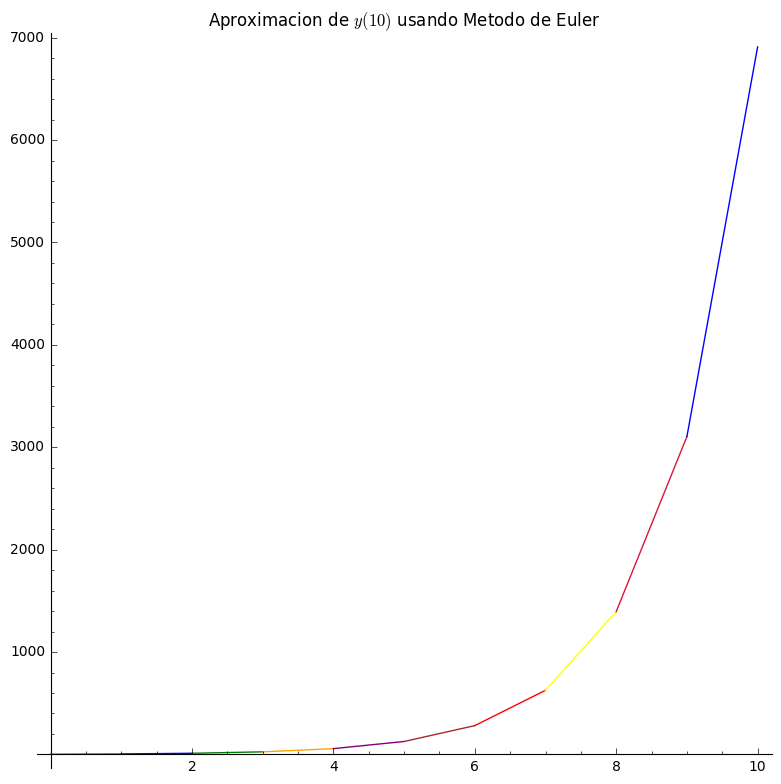

In [28]:
def getPointsEuler(x0, y0, f, h, n):
    res = [(x0, y0)]
    for i in range(1, n + 1):
        xi = res[i - 1][0] + h
        yi = res[i - 1][1] + h * f(x = res[i - 1][0], y = res[i - 1][1])
        res.append((xi, yi))
    return res

R.<x, y, z> = RR[]

f = 4 * exp(0.8 * x) - 0.5 * y

points = getPointsEuler(0, 2, f, 1, 10)
for x in points:
    print(x)
plotDerivative(points, Lagrange, "Aproximacion de $y(10)$ usando Metodo de Euler")

# Método de Taylor de orden 2

(0, 2)
(1, 5.85000000000000)
(2, 13.8937382710654)
(3, 31.4675355716334)
(4, 70.3738210832222)
(5, 156.833277083717)
(6, 349.172288329787)
(7, 777.180600792298)
(8, 1729.69934965549)
(9, 3849.54926774626)
(10, 8567.34980855573)


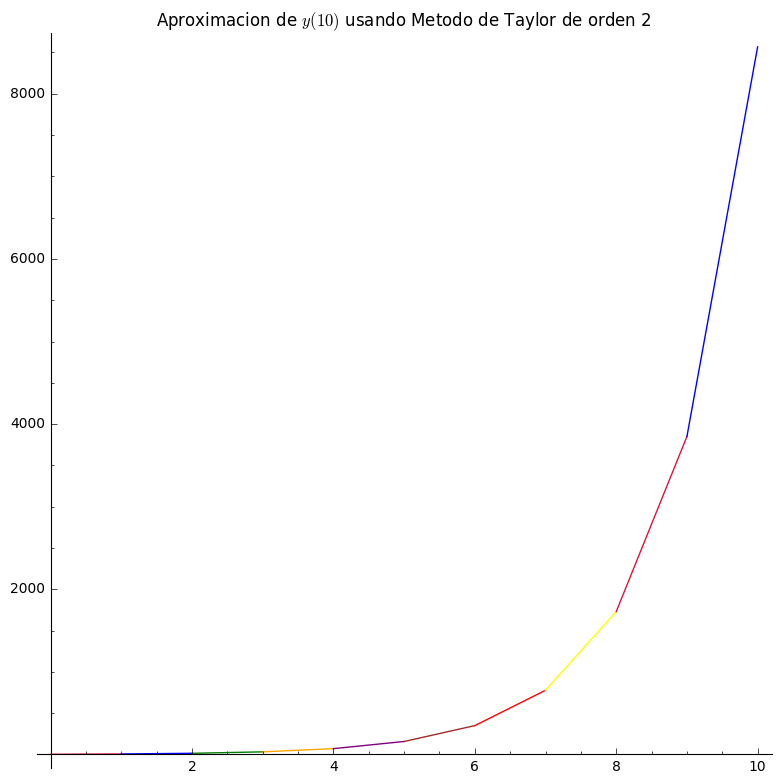

In [27]:
def TaylorOrden2(x0, y0, h, f, dfx, dfy, it):
    res = [(x0, y0)]
    for i in range(1, it + 1):
        k1 = h * f(x = res[i-1][0], y = res[i-1][1])
        k2 = h * h * (dfx(x = res[i-1][0], y = res[i-1][1]) + f(x = res[i-1][0], y = res[i-1][1]) * dfy(x = res[i-1][0], y = res[i-1][1]))
        xi = res[i - 1][0] + h
        yi = res[i - 1][1] + k1 + k2 / 2
        res.append((xi, yi))
    return res

R.<x, y, z> = RR[]
dfx = 3.2 * exp(0.8 * x)
dfy = - 0.5 * y ^ 0

points = TaylorOrden2(0, 2, 1, f, dfx, dfy, 10)
for x in points:
    print(x)
plotDerivative(points, Lagrange, "Aproximacion de $y(10)$ usando Metodo de Taylor de orden 2")

# Método de Heun

(0, 2)
(1, 6.70108185698494)
(2, 16.3197819378983)
(3, 37.1992488968647)
(4, 83.3377673354008)
(5, 185.814934848023)
(6, 413.753319350629)
(7, 920.959056965183)
(8, 2049.71589377356)
(9, 4561.77900026939)
(10, 10152.4586136462)


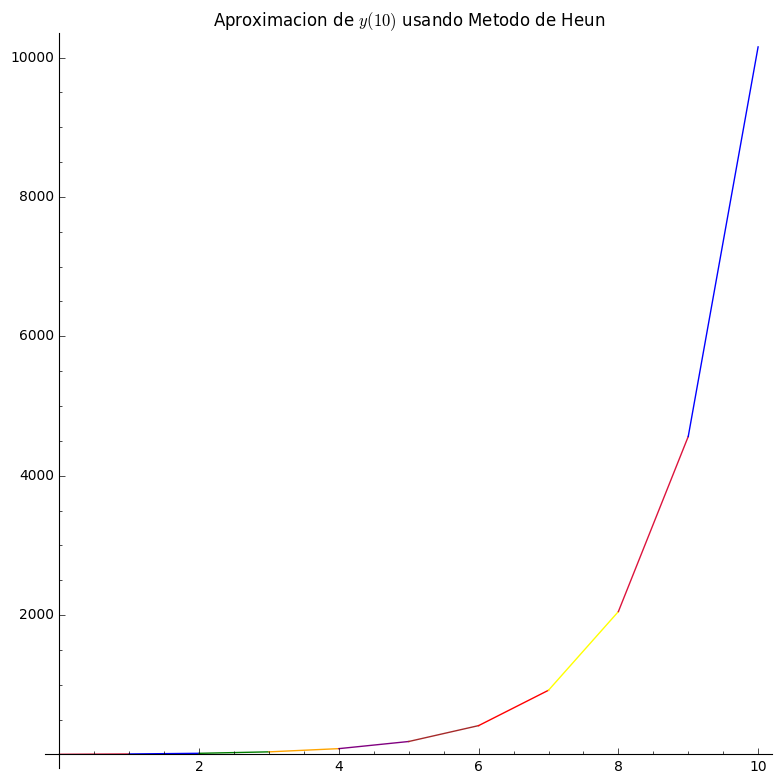

In [26]:
def Heun(x0, y0, h, f, it):
    res = [(x0, y0)]
    for i in range(1, it + 1):
        k1 = h * f(x = res[i - 1][0], y = res[i - 1][1])
        k2 = h * f(x = res[i - 1][0] + h, y = res[i - 1][1] + k1 * h)
        xi = res[i - 1][0] + h
        yi = res[i - 1][1] + (k1 + k2) / 2
        res.append((xi, yi));
    return res

points = Heun(0, 2, 1, f, 10)
for x in points:
    print(x)
plotDerivative(points, Lagrange, "Aproximacion de $y(10)$ usando Metodo de Heun")

# Método de Runge-Kutta de orden 3

(0, 2)
(1, 6.17567668094419)
(2, 14.7861639207199)
(3, 33.5367200325882)
(4, 75.0176702169432)
(5, 167.184676430743)
(6, 372.215166035906)
(7, 828.463960273798)
(8, 1843.83112527869)
(9, 4103.55225002236)
(10, 9132.64198148844)


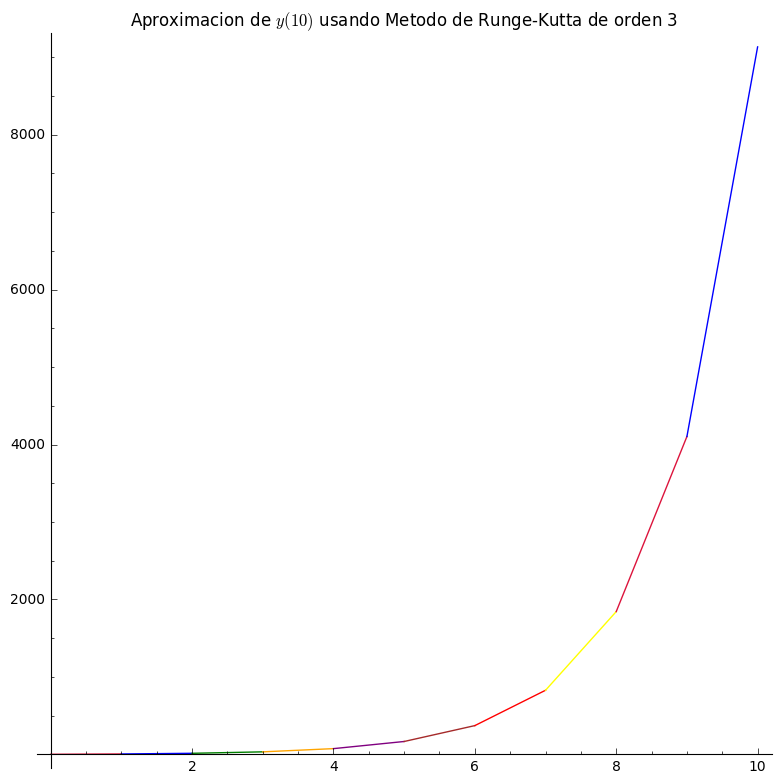

In [24]:
def RK3(x0, y0, h, f, it):
    res = [(x0, y0)]
    for i in range(1, it + 1):
        k1 = h * f(x = res[i - 1][0], y = res[i - 1][1])
        k2 = h * f(x = res[i - 1][0] + h / 2, y = res[i - 1][1] + k1 / 2)
        k3 = h * f(x = res[i - 1][0] + h, y = res[i - 1][1] - k1 + 2 * k2)
        xi = res[i - 1][0] + h
        yi = res[i - 1][1] + (k1 + 4 * k2 + k3) / 6
        res.append((xi, yi));
    return res

points = RK3(0, 2, 1, f, 10)
for x in points:
    print(x)
plotDerivative(points, Lagrange, "Aproximacion de $y(10)$ usando Metodo de Runge-Kutta de orden 3")

# Método de Runge-Kutta de orden 4

(0, 2)
(1, 6.20103707241429)
(2, 14.8624835881192)
(3, 33.7213480133557)
(4, 75.4391719903829)
(5, 168.130170904029)
(6, 374.324506360540)
(7, 833.161841786640)
(8, 1854.28876967319)
(9, 4126.82770337426)
(10, 9184.44346833367)


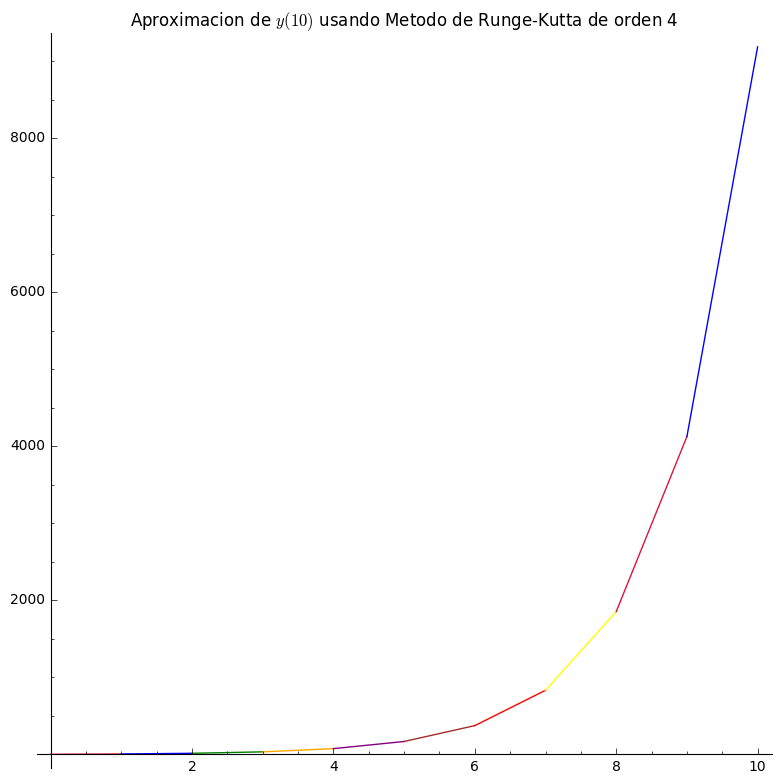

In [25]:
def RK4(x0, y0, h, f, it):
    res = [(x0, y0)]
    for i in range(1, it + 1):
        k1 = h * f(x = res[i - 1][0], y = res[i - 1][1])
        k2 = h * f(x = res[i - 1][0] + h / 2, y = res[i - 1][1] + k1 / 2)
        k3 = h * f(x = res[i - 1][0] + h / 2, y = res[i - 1][1] + k2 / 2)
        k4 = h * f(x = res[i - 1][0] + h, y = res[i - 1][1] + k3)
        xi = res[i - 1][0] + h
        yi = res[i - 1][1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        res.append((xi, yi));
    return res

points = RK4(0, 2, 1, f, 10)
for x in points:
    print(x)
plotDerivative(points, Lagrange, "Aproximacion de $y(10)$ usando Metodo de Runge-Kutta de orden 4")